# 2D Oblique Wall Collisions

Interactive code to illustrate concepts from MAT201 at Abertay University (JT 2022).

Visualisation of ball collision with a wall. 
Given a value of speed, angle of incidence and coeff. of restitution, calculate beta and post-collision speed and animate.

First we'll load in the libraries we need to create our example:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.patches as patches
import random
import sys
import math

First we'll need to fix some initial parameters. Choose values for the angle of incidence, initial velocity and the coefficient of restitution. We'll also pick a time step value, over which time will increase for each frame in the animation.

In [ ]:
# angle of incidence
alpha = 60.0
#initial velocity
u = 10.0
# The maximum x-range of ball's trajectory to plot.
XMAX = 5
# The coefficient of restitution for bounces (-v_up/v_down).
e = 0.5
# The time step for the animation.
dt = 0.005

These initial parameters will determine the behaviour of the ball after it collides with the wall. From the lectures, we know that 
$$ \tan{\left( \beta \right)}=e\tan{\left(\alpha\right)}$$
and
$$v^2=u^2\left( \cos^2{\left(\alpha\right)}+e^2\sin^2{\left( \alpha\right)}\right).$$
We can rearrange both of these equations to determine $\beta$ and $v$ (remembering also that Python trig. functions only accept arguments in radians, so we'll convert them on the fly):

In [ ]:
# angle after bounce (in radians)
beta=np.arctan(e*math.tan(math.radians(alpha)))
# velocity after bounce
v=math.sqrt(u**2*(math.cos(math.radians(alpha))**2+e**2*math.sin(math.radians(alpha))**2))

Now we can start to set up the simulation. We're going to be updating the position and velocity of the ball at each timestep. 
Let's choose an initial position for the ball; if we place the wall at $y=0$, this means our initial value of $y$ must be positive.

In [ ]:
x0, y0 = 0, 2.5

What about our initial velocity? Well, we're needing to solve equations of motion in both $x$ and $y$ directions, so we need to calculate these components of velocity too. We'll use a ball that is moving from left to right and descending, so make $v_y$ negative.

In [ ]:
vx0=u*math.cos(math.radians(alpha))
vy0=-u*math.sin(math.radians(alpha))

The animation will update the position of the ball in each frame. When it updates, we'll need to check if the ball has passed the wall, and if it has then change the sign of the $y$-component of velocity to bounce the ball from the wall.

In [ ]:
def get_pos(t=0):
    """A generator yielding the ball's position at time t."""
    x, y, vx, vy = x0, y0, vx0, vy0
    while x < XMAX:
        t += dt
        x += vx * dt
        y += vy * dt
        if y < 0:
            # bounce!
            y = 0
            vy = v * math.sin(beta)
            vx = v * math.cos(beta)
        yield x, y

Then we have to initialise the animation, so set some properties of the figure and the text to be displayed in the figure

In [ ]:
def init():
    """Initialize the animation figure."""
    ax.set_xlim(0, XMAX)
    ax.set_ylim(0, y0)
    ax.set_xlabel('$x$ /m')
    ax.set_ylabel('$y$ /m')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'Height: {y0:.1f} m')
    return line, ball, height_text

The final function will set up the animation loop, where each time the animation is updated, we'll append the position in $x$ and $y$ with our new values, move the ball to be in the correct location and update the text on the picture which states the current height of the ball above the wall.

In [ ]:
def animate(pos):
    """For each frame, advance the animation to the new position, pos."""
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'Height: {y:.1f} m')
    return line, ball, height_text

We haven't yet set up the figure upon which we'll draw the animation. We'll go ahead and do that here, where we'll also set up some of the objects we'll display on it. The ball will be plotted as a circle, and the $x$ and $y$ plot data are initialised here.

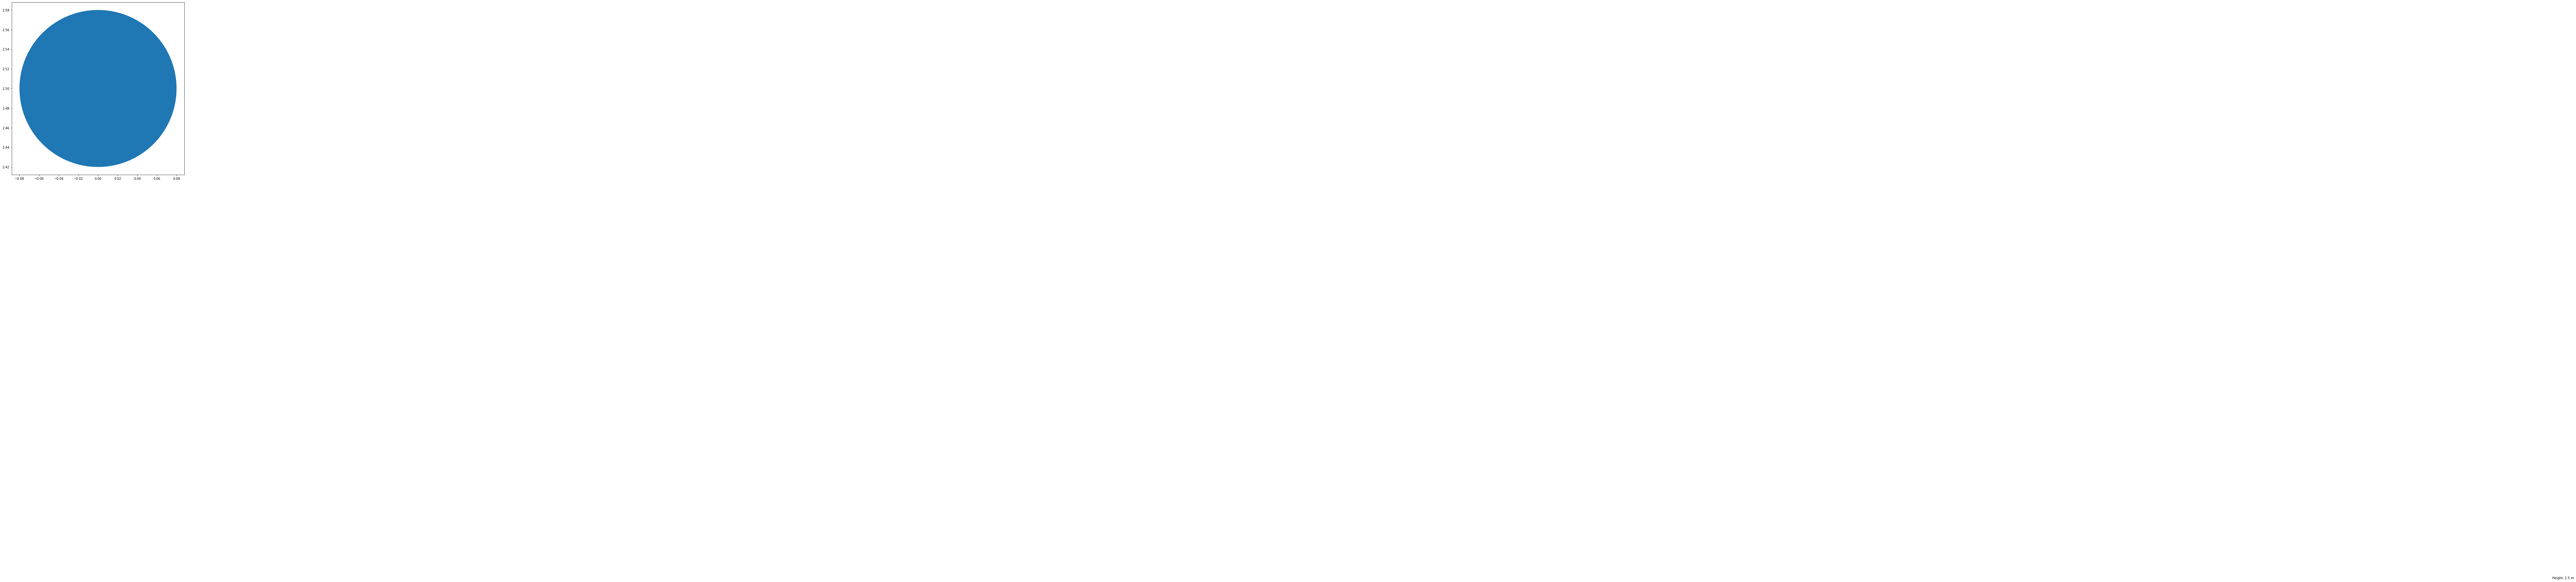

In [ ]:
# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_aspect('equal')

# These are the objects we need to keep track of.
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.08)
height_text = ax.text(XMAX*0.5, y0*0.8, f'Height: {y0:.1f} m')
ax.add_patch(ball)
xdata, ydata = [], []

The last set of instructions are to create the total simulation length of time and then to run and display the animation as an html5 video. Note again that the larger the interval is, the longer the movie and the more frames the animation will have to generate. 

In [ ]:
interval = 1000*dt
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True,
                      interval=interval, repeat=True, init_func=init)
from IPython.display import HTML
HTML(ani.to_html5_video())

And there we see the ball, hitting the wall, and changing direction depending on the initial angle of incidence and the coefficient of restitution.